# imports

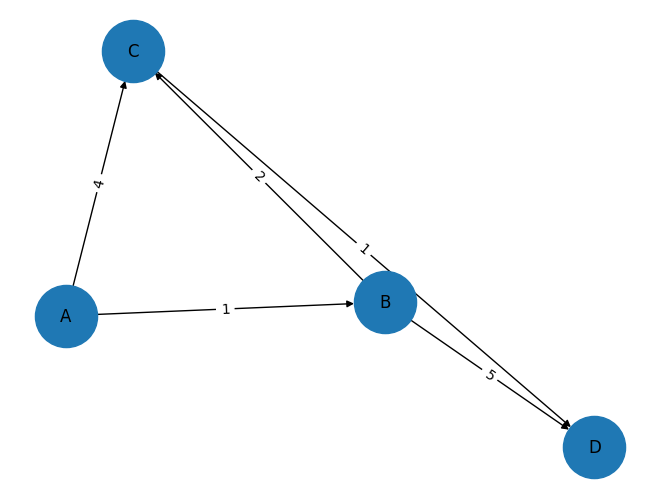

In [14]:
from collections import deque
import math
import networkx as nx
import matplotlib.pyplot as plt

a,b,c,d,e,f,g = 'A','B','C','D','E','F','G'

G = nx.DiGraph()

G.add_weighted_edges_from([
    ("A", "B", 1),
    ("A", "C", 4),
    ("B", "C", 2),
    ("B", "D", 5),
    ("C", "D", 1),
])

pos = nx.spring_layout(G) 
nx.draw(G, pos, with_labels=True, node_size=2000)
nx.draw_networkx_edge_labels(
    G, pos, edge_labels=nx.get_edge_attributes(G, "weight"))

plt.show()

# Directed Graph class

In [12]:
class DirectedGraph:
    def __init__(self):
        self.edges = {}
        
    def add_vertex(self, vertex):
        self.edges[vertex] = {} 

    def add_edge(self, origin_ver, dest_ver, weight=0):
        self.edges[origin_ver][dest_ver] = weight 

    def remove_vertex(self, vertex):
        for in_vert in list(self.edges.keys()):
            # self.remove_edge(adjacent_vert, vertex) 
            if in_vert in self.edges[vertex]:
                del self.edges[in_vert][vertex]  
        
        if vertex in self.edges:
            del self.edges[vertex]

    def remove_edge(self, origin_vert, dest_vert):
        if origin_vert in self.edges and dest_vert in self.edges[origin_vert]:
            del self.edges[origin_vert][dest_vert]  

    def bfs_1(self, vertex):
        visited = set()
        queue = deque()

        queue.append(vertex)
        
        while queue:
            vertex = queue.popleft()
            if vertex not in visited:
                visited.add(vertex) 
                print(vertex)
                for adjacent_vertex in self.edges[vertex]:
                    queue.append(adjacent_vertex)   

    def bfs(self, vertex):
        visited = set() 
        queue = deque() 
        queue.append(vertex) # add the 1st vert to the queue
        while queue: # while the queue has elems
            vertex = queue.popleft() # get the 1st elem
            if vertex not in visited: # if the vertext has not been visited 
                visited.add(vertex) # add the vertex to visited 
                print(vertex) # print the vertex whose adjacent verts we are about to loop
                for adjacent_vertex in self.edges[vertex]:
                    queue.append(adjacent_vertex)
    



    pass # end of class 






# eof

In [13]:
g = DirectedGraph()

g.add_vertex("A")
g.add_vertex("B")
g.add_vertex("C")
g.add_vertex("D")
g.add_vertex("e")

g.add_edge("A", "B")
g.add_edge("A", "C")
g.add_edge("A", "e")
g.add_edge("B", "D")

g.bfs("A")

A
B
C
e
D
